<a href="https://colab.research.google.com/github/CHSU2017/ExData_Plotting1/blob/master/AI_ML_Reading_Group_Round_1_Final_Project_Bayes_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI/ML Round 1 - Final Project 

## Instructions

1 . Please make your own copy of this notebook (see file menu)

2. Play with it, by running each code block, reading each instruction and modifying the code as instructed
(don't worry, ample hints are given, I'm 100% sure all members of our group can complete it.)

3. Send me a link with your copy by September 30. There is no "passing/failing." Sending the link back is enough. This just serves as a tangible culmination of our first round of AI/ML grassroots reading group. 


## Problem

In 2019 customers started changing from style A to style B. 

We want to convert more customers in 2020. We want to use a clasiffier to tell us how to guide our selling efforts.

### The data we have

For 2019 we have data in the following format:


```
id,name,region,yearly_expenditure,customer_for_years,has_product_A,has_product_B,has_product_C,group,reseller,converted_in_2019
1,Babbleopia,PE,$518990.34,13.5,1,0,36,8,47,0
2,Twimm,RU,$188884.14,13.9,0,1,3,20,69,1
```

A couple things worth noticing:
 - The last field tells us if they converted in 2019 (Bebbleopia didn't convert, Twimm did)
 - The "group" field is the grouping used by sales to map sales teams to clients (there are about.
 - has_product_X means they have bought licenses for product X
 - customer_for_years means they have been our customer for a certain period


### What we want

We want a list of the most promising groups to sell to. e.g. the result should be a list such as 


```
8,2,4,1,3,5,7,6
```


Indicating that more effort should be put in selling to customers in group 8 because they have the most likely-to-be-converted clients.

Note that we don't want just a list of customers likely to convert. The sales organization doesn't work like that, they use groups. This is important and essentially realistic.

Note also that we don't want the groups that have converted the most in the past. A whole group could have converted in 2019 and we don't need to sell them conversions. What we want is to learn from them what characteristics their customers had so we can identify OTHER groups with many customers of similar characteristics.

Before we tackle the problem, lets review notions we learned in the group which will help us.

# Naive Bayes refresher 

In Bayesian classification, we're interested in finding the probability of a label given some observed features, which we can write as
$P(L~|~{\rm features})$.
Bayes's theorem tells us how to express this in terms of quantities we can compute more directly:

$$
P(L~|~{\rm features}) = \frac{P({\rm features}~|~L)P(L)}{P({\rm features})}
$$

If we are trying to decide between two labels—let's call them $L_1$ and $L_2$—then one way to make this decision is to compute the ratio of the posterior probabilities for each label:

$$
\frac{P(L_1~|~{\rm features})}{P(L_2~|~{\rm features})} = \frac{P({\rm features}~|~L_1)}{P({\rm features}~|~L_2)}\frac{P(L_1)}{P(L_2)}
$$


# Connecting Naive Bayes theory and classification

We remember our first intuitive interpretation of Bayes formula:

$$\text{posterior} = \frac{\text{prior} \times \text{likelihood}}{\text{evidence}}$$

 can also be written as:

$$p(C_k \mid \mathbf{x}) = \frac{p(C_k) \ p(\mathbf{x} \mid C_k)}{p(\mathbf{x})} $$


In our case, we have only two classes $$C_0 \rightarrow \text{not target  for conversion}$$ and  $$C_1 \rightarrow \text{target  for conversion}$$ and $$C_1 target$$

When we talk about applying bayes classifier we are talking about training a probability model that will tell us given a set of features x whether $$ p(C_o|x) > p(C_1|x)$$


## Basic Naive Bayes classifier code

Just press the play button on the code block to generate random point scattered on the plane.

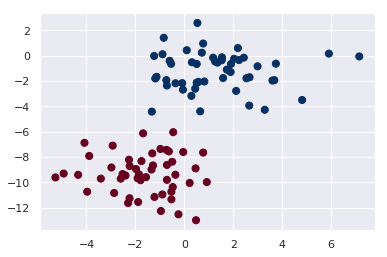

In [0]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs

X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

## Train our model

In [0]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);


## Predict labels of new values

Generate many points and see what color our bayesian classifier predicts for them


In [0]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)


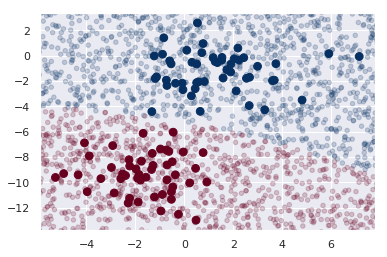

In [0]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.2)
plt.axis(lim);

# Back to customer group prediction
We want to predict which group will have more conversions from A to B, but we cannot simply see which group has more converts already (because we don't make money from people already converted). Instead we want to automatically identify which people are more "likely to be converted"(red) vs "unlikely to be converted"(blue) and pick the groups that have more red.

## Model Training Data 

Just like in the previous example we generated some mockup data to train our classifier. This time the data was not just simple x,y points on a cartesian plane. We instead generated it using  the following parameters:
![mockup data generation](https://i.imgur.com/tYzcHBi.png)
     




# Training the model

First we are going to teach our model with the 2019 data which kinds of customers get converted.



# Task 1 Read the data into a numpy array

Note: you need to upload the testing.csv file to this runtime first.




In [0]:
import numpy as np
f = open("simplified_training_data.csv")
# load the CSV file as a numpy matrix
dataset = np.loadtxt(f, delimiter=",")

# separate the data from the target attributes
X = dataset[:,0:-1]
Y = dataset[:,-1]
Y[0:80] = np.ones(80) # forcing a few more conversions to get prettier results (don't worry it's all mock data)
print("Data divided in features and one target (converted/not converted):")
print(dataset.shape)
print(X.shape)
print(Y.shape)
print(Y)

Data divided in features and one target (converted/not converted):
(196, 7)
(196, 6)
(196,)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0.]


Extra: *I used a simplified version of the data. You can use more complex versions for example one-hot-encode the country instead of ignoring it like I did.*

# Task 2 Train the model with 2019 data
Pass the model to scikit.learn bayesian classifier



In [0]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

classifier.fit(X, Y)

GaussianNB(priors=None, var_smoothing=1e-09)

# Task 3 Test with new data 

In [0]:
f = open("simplified_test_data.csv")
candidates = np.loadtxt(f, delimiter=",")
print(candidates.shape)

y = classifier.predict(candidates)
print(y.shape)
# print first 30 predictions:
print(y[0:30])

(805, 6)
(805,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 0.]


# Task 4 Count which group has the most clients predicted to be convertable

In [0]:
f = open("groups_only.csv")
groups  = np.loadtxt(f, delimiter=",")

counts = np.zeros(len(np.unique(groups)))
for i,prediction in enumerate(y):
  if prediction:
      counts[ int(groups[i])-1 ] +=1



# Task 5 The final result

The groups of clients that we should be focusing on are represented in this ordered list of group numbers:



In [0]:
print(np.argsort(counts))

[ 0  4 13  8 16 14 12 10 19  5  6  3 11  2 15  1 17 18  9  7]
